## Random Forest Feature Importance Computed in 3 Ways with Python

You will learn how to compute and plot:

- Feature Importance built-in the Random Forest algorithm,
- Feature Importance computed with Permutation method,
- Feature Importance computed with ```SHAP``` values.

Random Forest Built-in Feature Importance

- The Random Forest algorithm has built-in feature importance which can be computed in two ways:
 - Gini importance
 - Mean Decrease Accuracy

In [8]:
# load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

Load the data set and split for training and testing.

In [9]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

Fit the Random Forest Regressor with 100 Decision Trees:

In [10]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

To get the feature importances from the Random Forest model use the feature_importances_ attribute:

In [11]:
rf.feature_importances_

array([0.04688973, 0.00133735, 0.00670588, 0.0012763 , 0.0232913 ,
       0.26626312, 0.01539383, 0.06513905, 0.00495143, 0.0162625 ,
       0.00990436, 0.01259542, 0.52998973])

Let’s plot the importances (chart will be easier to interpret than values).



<BarContainer object of 13 artists>

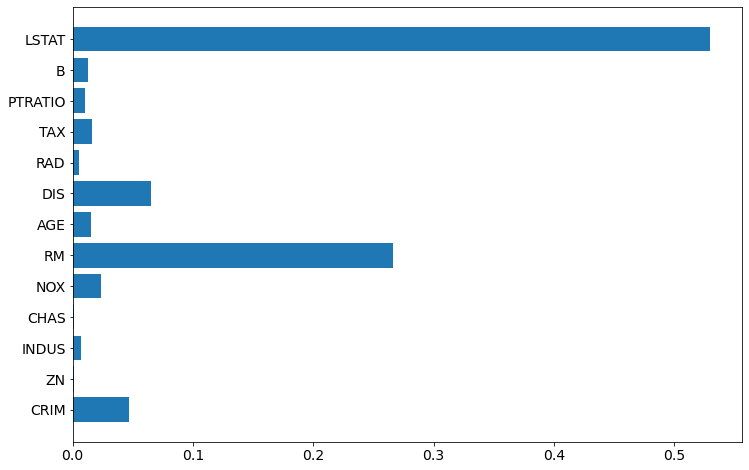

In [12]:
plt.barh(boston.feature_names, rf.feature_importances_)

To have even better chart, let’s sort the features, and plot again:

Text(0.5, 0, 'Random Forest Feature Importance')

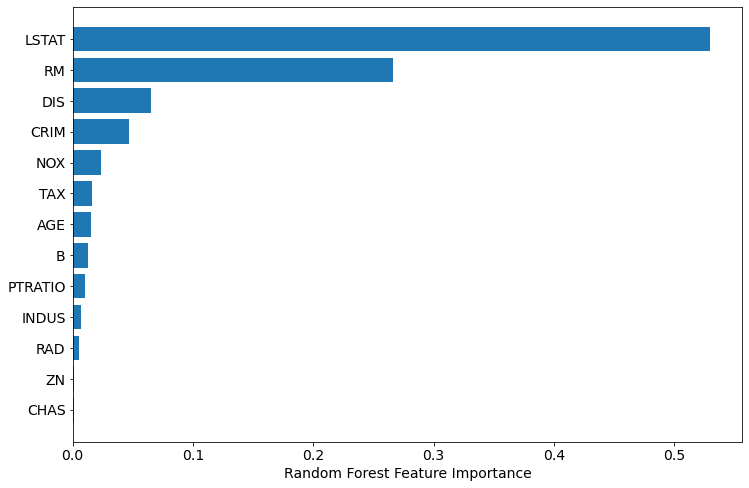

In [13]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Permutation Based Feature Importance
The permutation importance can be easily computed:



In [14]:
perm_importance = permutation_importance(rf, X_test, y_test)

To plot the importance:

Text(0.5, 0, 'Permutation Importance')

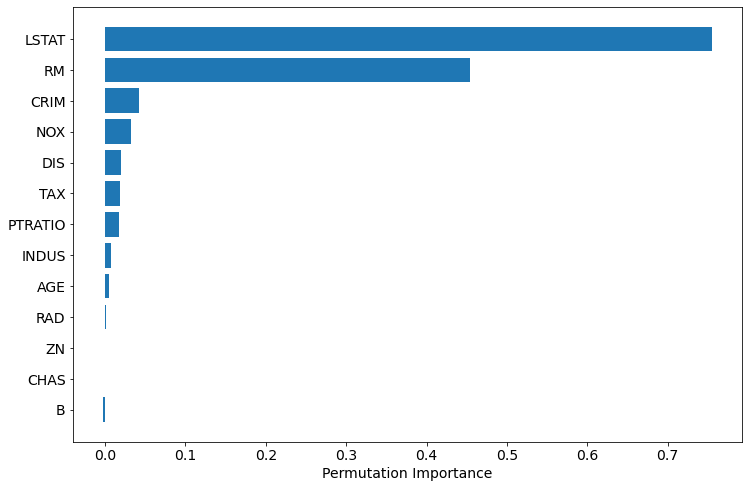

In [15]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

- The permutation based importance is computationally expensive. 
- The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

### Feature Importance Computed with SHAP Values

In [16]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

To plot feature importance as the horizontal bar plot we need to use summary_plot method:

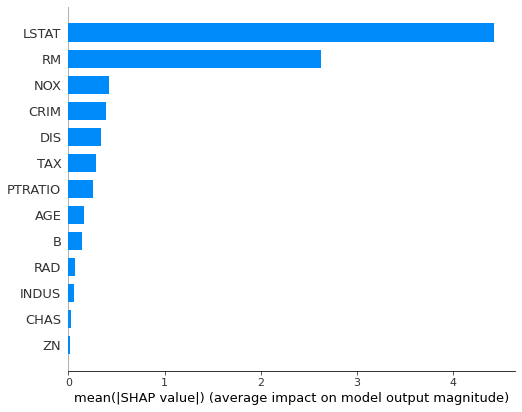

In [18]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

The feature importance can be plotted with more details, showing the feature value:



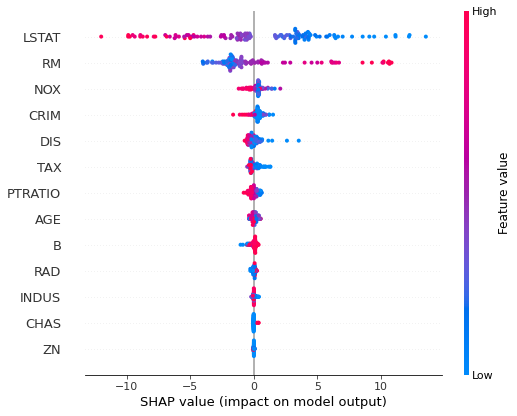

In [19]:
shap.summary_plot(shap_values, X_test)